### DATA PREPROCESSING
- Using House Pricing dataset

- Problem Statement

 - A Manager of Real-Estate company,want to find a true value(Price) of the property on the basis of past properties transactions
 
 - Price is the dependent variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/akepa/Desktop/Data Files/Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv',header=0)

In [3]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
df.shape

(506, 19)

### Data Dictionary - House Pricing Dataset
 1. price      - Value of the house
 2. crime_rate - Crime rate in the neighbour hood
 3. resid_area - Proportion of residential area in the town
 4. air_qual   - Quality of air in that neighbourhood
 5. room_num   - Average number of rooms in houses in that locality
 6. age        - How old is the house construction in years
 7. dist1      - Distance from employment hub 1
 8. dist2      - Distance from employment hub 2
 9. dist3      - Distance from employment hub 3
 10. dist4     - Distance from employment hub 4
 11. teachers  - Number of teachers per thousand population in that town
 12. poor_prop - Proportion of poor population in the town
 13. airport   - Is there an airport in the city(Yes/No)
 14. n_hos_beds- Number of hospital beds per thousand population in town
 15. n_hot_rooms- Number of hotel rooms per thousand population in town
 16. waterbody  - What type of natural fresh water source is there in the city(lake/river/both/none)
 17. rainfall   - The yearly average rainfall in centimeters
 18. bus_ter    - Is there a bus terminal in the city?(Yes/No)
 19. parks      - Proportion of land assigned as parks and green areas in town

In [5]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


- from above description observe if any missing values or outliers
 - n_hos_beds have missed values
 - rainfall and some other variables has outliers
 

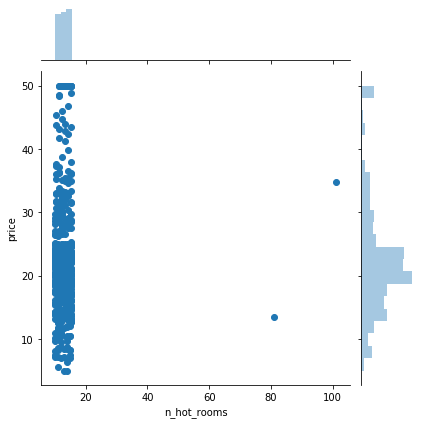

In [6]:
#plot the graphs to observe in detail
sns.jointplot(x='n_hot_rooms',y='price',data=df)

The two dots that found between 80 and 100 are outliers of n_hot_rooms

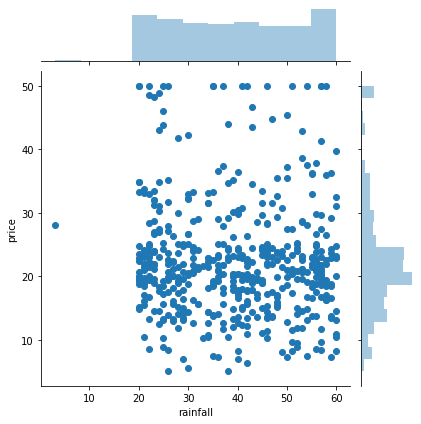

In [7]:
#rainfall
sns.jointplot(x='rainfall',y='price',data=df)

'Here is the single outlier at <10 rainfall'

In [8]:
df.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

Categorical variables are airport , waterbody, bus_ter

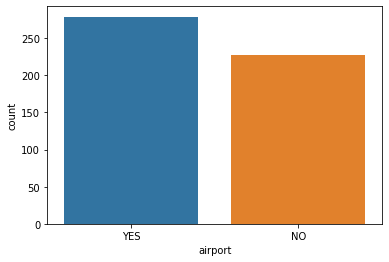

In [9]:
#plot graph on categorical data
sns.countplot(x='airport',data=df)

Everything data about airport variable is good 

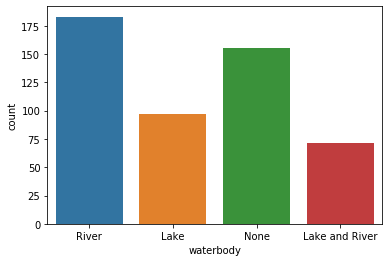

In [10]:
#waterbody
sns.countplot(x='waterbody',data=df)

Nothing unusual about waterbody variable too

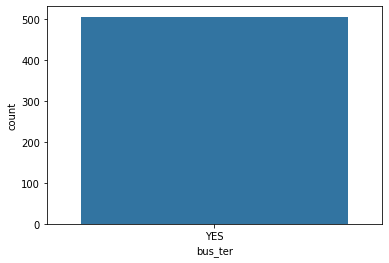

In [11]:
#bus_ter
sns.countplot(x='bus_ter',data=df)

Since there is no change in data and everything is common , this variable is not useful for prediction as it doesn't impact anything 

## Outlier Treatment
- Outlier is an observation that appears far away and diverges from an overall pattern in a simple
- Reasons it occurs
  - Data Entry Errors
  - Measuremet Errors
  - Sampling Errors
- Impact 
  - It increases the error variance and reduces the power of statistical tests
- Solution
  - Detect outliers using EDD and Visualisation methods such as scatter plot,histogram,boxplots
  - Capping and Flooring
    - find the upper limit and lower limit beyond which we will change values
  - Exponential smoothing
    - Extrapolate the curve and cap all the values falling outside the value generated by the curve
  - Sigma approach(used in Industries)
    - Identify outliers by capturing all the values outside of mu + or -(x*sigma)
    - You can use any multiplier as x ,as per business requirement
  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 75.2+ KB


In [13]:
#upper limit Copping and Flooring
uv=np.percentile(df.n_hot_rooms,[99])[0]
uv

15.399519999999999

In [14]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [15]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

C:\Users\akepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [17]:
lv = np.percentile(df.rainfall,[1])[0]
lv

20.0

In [18]:
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [19]:
df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv

C:\Users\akepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


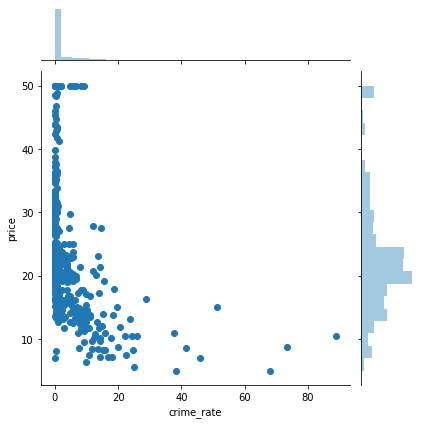

In [21]:
#crimarate variable
sns.jointplot(x='crime_rate',y='price',data=df)

In [22]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


### Missing Values
 - Impact
   - Handling missing data is important as many machine learning algorithms do not support data with missing values
 - Solution
   - Remove rows with missing values
   - For numerical variables , impute missing values with mean/median
   - For categorical variables, impute missing values with mode
   - We can perform segment based imputation also
   
#### Note
 - Use business knowledge to take separate approach for each variable
 - It is advisable to impute instead of remove in case of small sample size or large proportion of observations with missing values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 75.2+ KB


In [24]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [25]:
#for all colums
# df = df.fillna(df.mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     506 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 75.2+ KB


### Seasonality
 - Seasonality is the presence of variations that occur at specific regular intervals less than a year , such as weekly,monthly,or quaterly.
 - Examples
   - Ice cream sales
   - Festival sales
 - Solutions
   - Calculate multiplication factor(m) for each month as 
            < m(month) = mu(year) / mu(month) >
   - Multiply each observation with its multiplication factor

### Bivariate Analysis
 - Bivariate analysis is the simultaneous analysis of two variables(attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association , or whether there are differences between two variables and the significance of these differences
 
 - Scatter Plot
    - Scatter plot indicates the type (linear or non linear) and the strength of the releation ship between two variables
    - We will use scatter plot to transform variables 
      
    
 - Correlation
    - Linear correlation quantifies the strength of a linear relationship between two numerical variables
    - When there is no correlation between two variables, there is no tendency for the values of one quantity to increase or decrease with the values of the second quantity
    - Correlation is used to drop Non usable variables
    
 
 - Variable Transformation(Transform your existing variables to extract more information out of them)
   - Identify  using business knowledge and bivariate analysis to modify variable
   - Use mean/median of variables conveying similar type of information 
   - Create ratio variable which are more relevant to business
   - Transform variable by taking log,exponential,roots etc
 

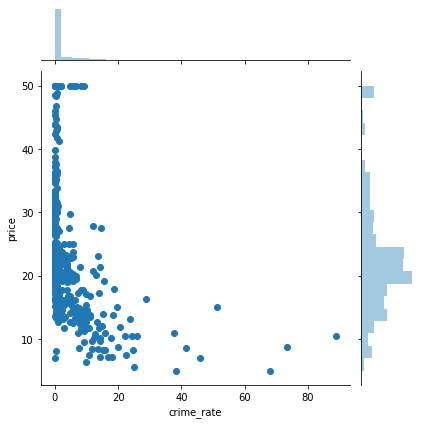

In [27]:
#Transforming crime_rate variable 
sns.jointplot(x='crime_rate' , y = 'price' , data = df)

In [28]:
# log(0) = undefined ; to transform into log function ...
df.crime_rate = np.log(1+df.crime_rate)

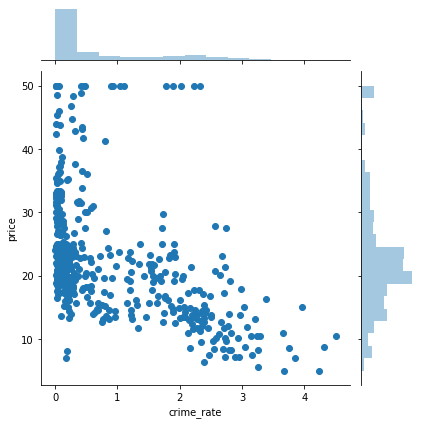

In [29]:
sns.jointplot(x='crime_rate' , y = 'price' , data = df)

In [30]:
# In our dataset we have four variables dist1,dist2,dist3,dist4 which is overly representing about employment in our data
# One way to solve,create a new variable , get the means of these four values in each observation and store it in a new variable
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4


In [31]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [32]:
del df['dist1']

In [33]:
del df['dist2']
del df['dist3']
del df['dist4']

In [34]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [35]:
df.bus_ter

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
501    YES
502    YES
503    YES
504    YES
505    YES
Name: bus_ter, Length: 506, dtype: object

In [36]:
#since bus_ter has no change it can be removed
del df['bus_ter']

In [37]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


#### Dummy variable
  - A Dummy Variable or Indicator Variable is an artificial variable created to represent an attribute with two or more distinct categories/ levels.
  - WHY
    - Regression analysis treats all independent (X) variables in the analysis as numerical
    - Nominal variables , or variables that describe a characteristic using two or more categories , are common place in regression research , but are not always useable in categorical form
  - HOW
    - We can make a separate column , or variables , for each category
    - This new variables can take value 0 or 1 depending on the value of the categorical variable

In [38]:
df = pd.get_dummies(df)

In [39]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [40]:
del df['airport_NO']
del df['waterbody_None']

In [41]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


#### Correlation Coefficient
 - Correlation is a statistical measure that indicates the extent of which two or more variables fluctuate together.
 - A Correlation coefficient is a way to put a value to the relationship
 - A '0' means there is no relationship between the variables at all.
 - While -1 or 1 means that there is a perfect negative or positive correlation
#### Caution vs correlation
 - The relation between something that happens and the thing that cause it . The first thing that happens is the cause and the second thing is the effect
#### Correlation Matrix 
 - It gives the correlation between all variables in row column matrix
 

In [42]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


In [43]:
#As park and air_qual has 0.9 correlation we delete park variable
del df['parks']

In [44]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


#### Linear Regression
 - It is an approach to modelling the relationship between a dependent variable and one or more independent variables
 - Questions
   - How accurately can we predict the price of a house, given the values of all variables ?
   - How accurately can we estimate the effect of each of this variables on the house price ? 
 - Two types
   - Simple linear regression
     - It is an approach for predicting a quantitative response Y on the basis of a single predictor Variable X 
                      Y ~ b0 + b1 * x 
                      

In [45]:
import statsmodels.api as sn

In [48]:
X = sn.add_constant(df['room_num'])

In [49]:
lm = sn.OLS(df['price'],X).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        14:49:49   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#another method
from sklearn.linear_model import LinearRegression

In [64]:
y = df['price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [63]:
x = df[['room_num']]
x.head()

,room_num
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [65]:
lm2 = LinearRegression()

In [66]:
lm2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(lm2.intercept_ , lm2.coef_)

-34.65924312309721 [9.09966966]


In [68]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False

In [69]:
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [70]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

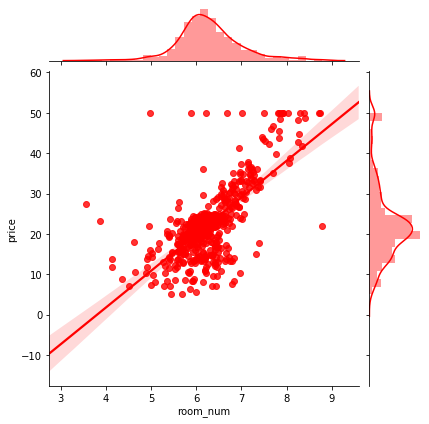

In [73]:
sns.jointplot(x=df['room_num'],y=df['price'],data= df,kind='reg',color = 'red')

#### Multiple Linear Regression
 - In Multiple linear regression more than one predictor variables are used to predict the response variable
                y ~ b0 + b1*X1 + b2*X2 + ..., + bp*Xp+e
                
                b0 - intercept
                p  - number of predictors
                e  - error term
 - For our model
              
          price = b0 + b1*Crime_rate + b2*poor_pop........b16*avg_dist

In [81]:
X_multi = df.drop('price',axis = 1)

In [82]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [83]:
y_multi = df['price']
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [84]:
X_multi_cons = sn.add_constant(X_multi)
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [88]:
#OLS = ordinary least squares
lm_multi = sn.OLS(y_multi,X_multi_cons).fit()

In [89]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.19e-125
Time:                        16:01:39   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The lower the p value ,most significant to the dependent
- If t < 0.05 ,observe their signs and coefficients to make business sense out of data

In [90]:
lm3 = LinearRegression()

In [91]:
lm3.fit(X_multi,y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print(lm3.intercept_,lm3.coef_)

-6.498625198419852 [ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  1.13151586e+00
  2.64086064e-01 -6.87555889e-01 -2.91318712e-01]


In [93]:
help(lm3)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False

In [109]:
#splitting data
from sklearn.model_selection import train_test_split

In [110]:
X_train , X_test ,y_train , y_test = train_test_split(x_multi,y_multi,test_size = 0.2, random_state = 0)

In [112]:
print( X_train.shape,X_test.shape , y_train.shape , y_test.shape)

(404, 15) (102, 15) (404,) (102,)


In [113]:
lm_a = LinearRegression()

In [114]:
lm_a.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_test_a = lm_a.predict(X_test)

In [116]:
y_train_a = lm_a.predict(X_train)

In [117]:
from sklearn.metrics import r2_score

In [118]:
r2_score(y_test,y_test_a)

0.5496468288205675

In [119]:
r2_score(y_train,y_train_a)

0.756463540591123

#### Shrinkage Methods
  - This approach involves fitting a model involving all p predictors. However, the estimated coefficients are shrunken towards zero relative to the least squares estimates
  - Mainly Two Methods 
    - Ridge Regression
      - we will try to shrink the coefficients of variable towards zero by adding shrinkage penality but wont become complete zero
                        RSS = sum(y(i) - b0 - sum(b(i) * x(i)))**2 + L * sum(b(i)**2)
                        L (lambda) - tuning parameter
                        
    - Lasso Regression
      - We will try to shrink the coefficient of variable towards zero by adding shrinkage penality
                        RSS = Sum(y(i)-b0 - sum(b(i)* x(i)))**2 + L * sum(|b(i)|)

In [121]:
#standardize data
from sklearn import preprocessing

In [123]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [124]:
X_train_s = scaler.transform(X_train)

In [125]:
X_test_s = scaler.transform(X_test)

In [126]:
from sklearn.linear_model import Ridge

In [127]:
lm_r = Ridge(alpha = 0.5 )
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
r2_score(y_test  , lm_r.predict(X_test_s))

0.5494318046087934

In [129]:
#Validation Curves
from sklearn.model_selection import validation_curve

In [130]:
validation_curve?

In [131]:
param_range = np.logspace(-2,8,100)
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [132]:
train_scores,test_scores = validation_curve(Ridge(),X_train_s,y_train,'alpha',param_range,scoring='r2')

C:\Users\akepa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [133]:
print(train_scores)
print(test_scores)

[[7.52194685e-01 7.61666421e-01 7.79533753e-01]
 [7.52194684e-01 7.61666421e-01 7.79533752e-01]
 [7.52194682e-01 7.61666420e-01 7.79533751e-01]
 [7.52194679e-01 7.61666419e-01 7.79533750e-01]
 [7.52194674e-01 7.61666417e-01 7.79533747e-01]
 [7.52194666e-01 7.61666413e-01 7.79533743e-01]
 [7.52194653e-01 7.61666408e-01 7.79533737e-01]
 [7.52194633e-01 7.61666400e-01 7.79533727e-01]
 [7.52194601e-01 7.61666387e-01 7.79533712e-01]
 [7.52194549e-01 7.61666366e-01 7.79533687e-01]
 [7.52194468e-01 7.61666333e-01 7.79533648e-01]
 [7.52194339e-01 7.61666280e-01 7.79533585e-01]
 [7.52194133e-01 7.61666196e-01 7.79533485e-01]
 [7.52193806e-01 7.61666062e-01 7.79533326e-01]
 [7.52193287e-01 7.61665849e-01 7.79533075e-01]
 [7.52192464e-01 7.61665512e-01 7.79532675e-01]
 [7.52191160e-01 7.61664975e-01 7.79532041e-01]
 [7.52189097e-01 7.61664125e-01 7.79531035e-01]
 [7.52185838e-01 7.61662777e-01 7.79529444e-01]
 [7.52180700e-01 7.61660644e-01 7.79526928e-01]
 [7.52172621e-01 7.61657272e-01 7.795229

In [135]:
train_mean = np.mean(train_scores,axis=1)
train_mean

array([7.64464953e-01, 7.64464952e-01, 7.64464951e-01, 7.64464949e-01,
       7.64464946e-01, 7.64464941e-01, 7.64464933e-01, 7.64464920e-01,
       7.64464900e-01, 7.64464867e-01, 7.64464816e-01, 7.64464734e-01,
       7.64464604e-01, 7.64464398e-01, 7.64464070e-01, 7.64463550e-01,
       7.64462725e-01, 7.64461419e-01, 7.64459353e-01, 7.64456091e-01,
       7.64450950e-01, 7.64442872e-01, 7.64430219e-01, 7.64410476e-01,
       7.64379825e-01, 7.64332515e-01, 7.64260009e-01, 7.64149809e-01,
       7.63983943e-01, 7.63737047e-01, 7.63374055e-01, 7.62847479e-01,
       7.62094256e-01, 7.61031995e-01, 7.59554333e-01, 7.57524980e-01,
       7.54770192e-01, 7.51070061e-01, 7.46150136e-01, 7.39676406e-01,
       7.31257767e-01, 7.20460047e-01, 7.06833664e-01, 6.89952978e-01,
       6.69460771e-01, 6.45108717e-01, 6.16786807e-01, 5.84541413e-01,
       5.48588621e-01, 5.09330249e-01, 4.67371597e-01, 4.23527416e-01,
       3.78796353e-01, 3.34291745e-01, 2.91135463e-01, 2.50339693e-01,
      

In [136]:
test_mean = np.mean(test_scores,axis=1)

In [137]:
max(test_mean)

0.7246669870662997

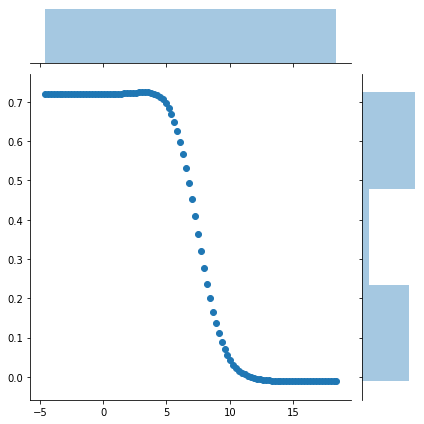

In [138]:
sns.jointplot(x = np.log(param_range),y=test_mean)

In [139]:
np.where(test_mean == max(test_mean))

(array([33], dtype=int64),)

In [140]:
param_range[33]

21.544346900318846

In [141]:
lm_r_best = Ridge(alpha = param_range[33])

In [142]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=21.544346900318846, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [145]:
r2_score(y_test,lm_r_best.predict(X_test_s))

0.5406732551555002

In [146]:
r2_score(y_train,lm_r_best.predict(X_train_s))

0.7548323614349695

In [147]:
from sklearn.linear_model import Lasso

In [148]:
lm_l = Lasso(alpha = 0.5)
lm_l.fit(X_train_s,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
r2_score(y_test,lm_l.predict(X_test_s))

0.5000236533631628

In [150]:
train_scores_l,test_scores_l = validation_curve(Lasso(),X_train_s,y_train,'alpha',param_range,scoring='r2')

C:\Users\akepa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [152]:
train_mean_l = np.mean(train_scores_l,axis=1)
test_mean_l = np.mean(test_scores_l,axis =1)

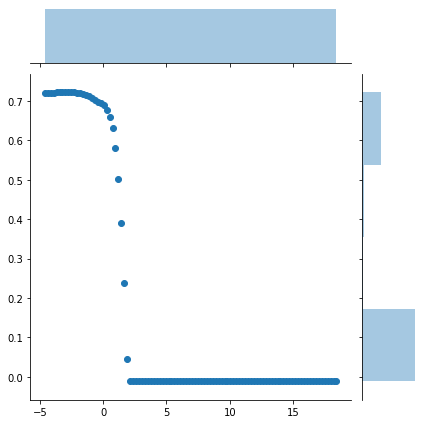

In [153]:
sns.jointplot(x = np.log(param_range),y=test_mean_l)

In [154]:
np.where(test_mean_l == max(test_mean_l))

(array([8], dtype=int64),)

In [156]:
param_range[8]

0.06428073117284319

In [158]:
lm_l_best = Lasso(alpha = param_range[8])

In [159]:
lm_l_best.fit(X_train_s,y_train)

Lasso(alpha=0.06428073117284319, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [160]:
r2_score(y_test,lm_l_best.predict(X_test_s))

0.5478153447028387

In [161]:
r2_score(y_train,lm_l_best.predict(X_train_s))

0.7555357522986872